# GIST incidence and pathways in England by year
Author: Adam Brentnall

*This work uses data that has been provided by patients and collected by the NHS as part of their care and support. The data is collated, maintained and quality assured by the National Cancer Registration and Analysis Service, which is part of Public Health England (PHE). The data is taken from the Get Data Out tables.*


Last update this notebook: 16 April 2020

Data taken from: https://www.cancerdata.nhs.uk/getdataout

Data download: 16 April 2020


## Summary

This notebook plots some data relating to GIST diagnosis from Public Health England (PHE) through time. 

## Methods

Graphical inspection of data from PHE. Focus on

**Incidence**: Statistics on the number of new tumours diagnosed in each group and the incidence rate of cancer in this group with upper and lower confidence intervals. 

**Routes to Diagnosis**: Statistics on the number of tumours diagnosed by each 'route to diagnosis' and the % of tumours diagnosed by each route with the upper and lower confidence intervals. The eight standard diagnostic routes provided by PHE are - two week wait; GP referral; screening; other outpatient; inpatient elective; emergency presentation; death certificate only and unknown - are provided, along with a 'not classified' group. There is no screening program for GIST so this category is not included.

## Analysis

In [1]:
## Load libraries
library("ggplot2")
library("tidyr")

In [2]:
## Load data

indta <- read.csv("../data/200104-GDO_data_wide_sarcoma.csv")

mydta <- indta[indta$Tumour.Type.2== "Gastrointestinal stromal sarcoma (GIST)", ]

selectcols <- c("Year", "Tumour.Type.3", "Age", "Incidence", "Population", "Incidence.Rate", "Incidence.Rate.LCI..95..", "Incidence.Rate.UCI..95..","Routes.Population", "Two.Week.Wait", "Two.Week.Wait.percentage", "Two.Week.Wait.LCI", "Two.Week.Wait.UCI", "GP.Referral", "GP.Referral.percentage", "GP.Referral.LCI", "GP.Referral.UCI", "Other.Outpatient", "Other.Outpatient.percentage", "Other.Outpatient.LCI", "Other.Outpatient.UCI", "Inpatient.Elective", "Inpatient.Elective.percentage", "Inpatient.Elective.LCI", "Inpatient.Elective.UCI", "Emergency.Presentation", "Emergency.Presentation.percentage", "Emergency.Presentation.LCI", "Emergency.Presentation.UCI", "DCO", "DCO.percentage", "DCO.LCI", "DCO.UCI", "Unknown.Route", "Unknown.Route.percentage", "Unknown.Route.LCI", "Unknown.Route.UCI", "Route.not.classified", "Route.not.classified.percentage","Route.not.classified.LCI", "Route.not.classified.UCI")

colids  <- which(colnames(mydta) %in% selectcols)

mydta2 <- mydta[,colids]

In [3]:
## Data manipulation for plots

myyr <- c(2013, 2014, 2015, 2016, 2017)

mydta3 <- mydta2[mydta2$Year%in%myyr,]

mydta3[,4:41]<-apply(mydta3[,4:41],2,function(ind) as.double(as.character(ind)))

mydta3$Year <- as.integer(as.character(mydta3$Year))

mydta4<- gather(mydta3, "key", "route", Two.Week.Wait.percentage, GP.Referral.percentage, Other.Outpatient.percentage, Inpatient.Elective.percentage, Emergency.Presentation.percentage, DCO.percentage, Unknown.Route.percentage, Route.not.classified.percentage)

mydta4$key  <- substr(mydta4$key, 1, nchar(mydta4$key)-11)

myordkey  <- rev(c("GP.Referral","Emergency.Presentation", "Other.Outpatient", "Two.Week.Wait", "Inpatient.Elective", "DCO",  "Route.not.classified"  , "Unknown.Route"))

mydta4<-mydta4[order(match(mydta4$key, myordkey)),]

mydta4$key <- factor(mydta4$key, levels=myordkey)
                     
mydta4$Year <- as.character(mydta4$Year)                     

Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“NAs int

## GIST Incidence by year

png 
  2

png 
  2

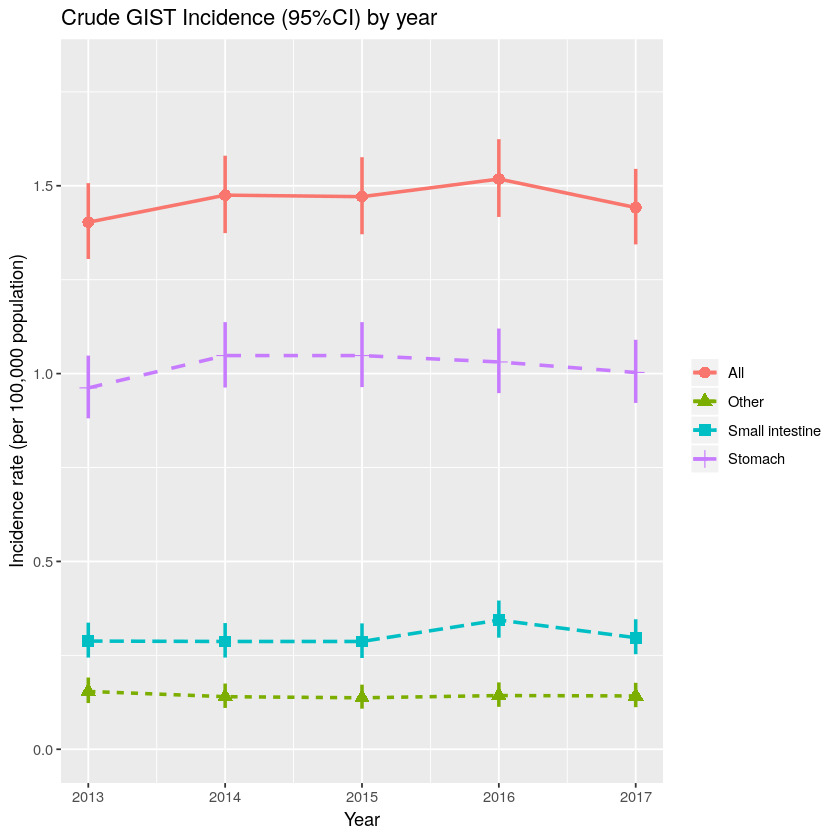

In [4]:
## plot 1 - incidence rate by year                                                                                                                                                   

myplot1 <- ggplot(data = mydta3[mydta3$Age=="All ages",], aes(x = Year, y = Incidence.Rate, group=Tumour.Type.3)) +
        geom_line(aes(color=Tumour.Type.3, linetype=Tumour.Type.3), size=1) +
        geom_point(aes(color=Tumour.Type.3, shape=Tumour.Type.3), size=3) +
        geom_segment(aes(x = Year, xend = Year, y = Incidence.Rate.LCI..95.., yend = Incidence.Rate.UCI..95.., colour = Tumour.Type.3), size = 1) +
        ylim(0,1.8) +
        labs(title = "Crude GIST Incidence (95%CI) by year",
         x = "Year", y = "Incidence rate (per 100,000 population)") +
         theme(legend.title=element_blank())

##save chart
pdf("charts/plot1.pdf")
myplot1
dev.off()

png("charts/plot1.png")
myplot1
dev.off()

##show chart
myplot1



## GIST dignosis routes

Warning message:
“Removed 8 rows containing missing values (position_stack).”

png 
  2

Warning message:
“Removed 8 rows containing missing values (position_stack).”

png 
  2

Warning message:
“Removed 8 rows containing missing values (position_stack).”

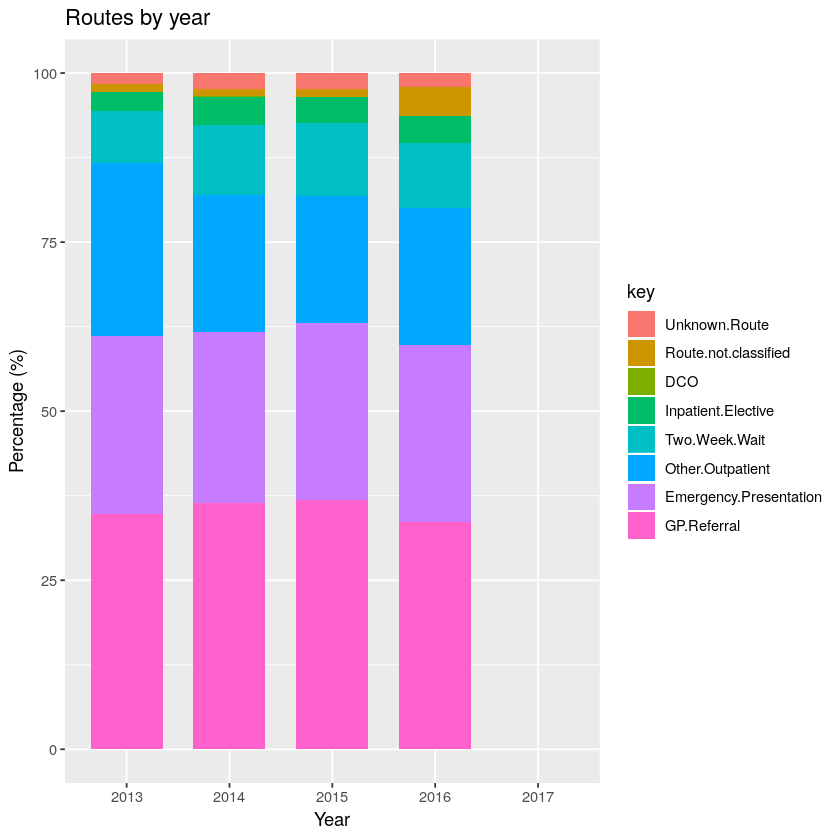

In [5]:
##plot 2 - route by year                                                                                                                                                             

myplot2 <- ggplot(mydta4[mydta4$Age=="All ages" & mydta4$Tumour.Type.3=="All",], aes(x = Year, y = route))+
  geom_col(aes(fill = key), width = 0.7) +
    labs(title = "Routes by year",
         x = "Year", y = "Percentage (%)")


##save chart
pdf("charts/plot2.pdf")
myplot2
dev.off()

png("charts/plot2.png")
myplot2
dev.off()

##show chart
myplot2



## Stomach sub-type, incidence by age group

png 
  2

png 
  2

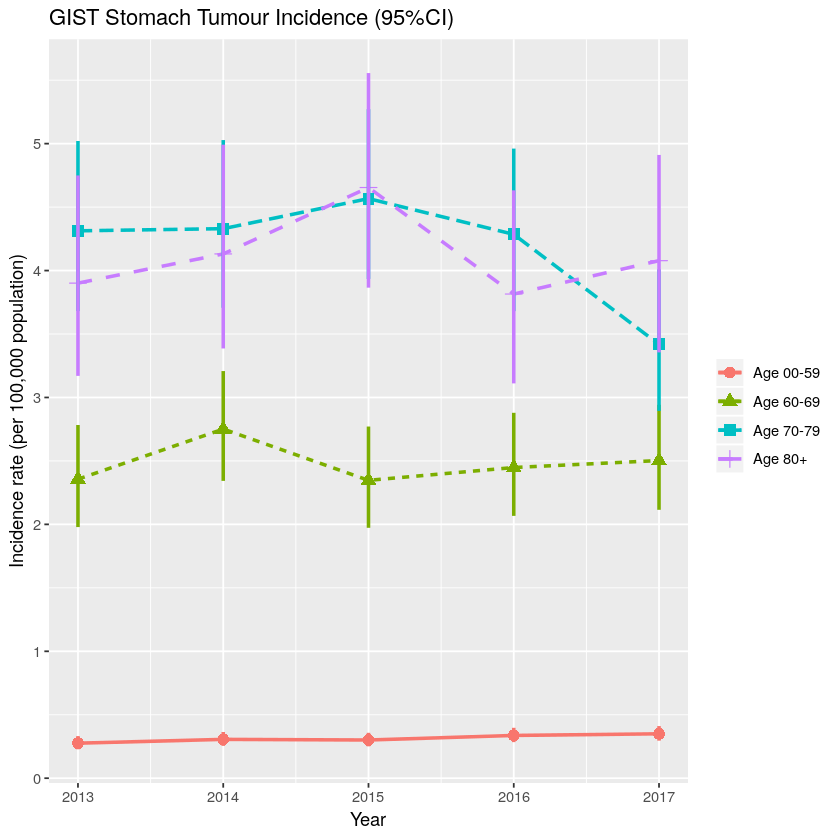

In [6]:
## plot 3 - Stomach incidence by age group and year                                                                                                                                            

myplot3 <- ggplot(data = mydta3[mydta3$Tumour.Type.3=="Stomach" & mydta3$Age!="All ages",], aes(x = Year, y = Incidence.Rate, group=Age)) +
    geom_line(aes(color=Age, linetype=Age), size=1) +
    geom_point(aes(color=Age, shape=Age), size=3) +
    geom_segment(aes(x = Year, xend = Year, y = Incidence.Rate.LCI..95.., yend = Incidence.Rate.UCI..95.., colour = Age), size = 1) +
    labs(title = "GIST Stomach Tumour Incidence (95%CI)",
         x = "Year", y = "Incidence rate (per 100,000 population)") +
    theme(legend.title=element_blank())

##save chart
pdf("charts/plot3.pdf")
myplot3
dev.off()

png("charts/plot3.png")
myplot3
dev.off()

myplot3
